In [ ]:
# Lab 10: Visualizing Flow Data

**Description:**
- Each row represents a flow from a source to a target with a value.
- Used for Sankey, alluvial, chord, directed, and stream graph visualizations.
- 6 rows, 3 columns: `source`, `target`, `value`.

**Features used:**
- Source, target, value (flow quantity)

**Observation:**
- The dataset is ideal for demonstrating flow visualizations between stages or entities.

## 1. Sankey Diagram

- Visualizes flow between two or more stages.
- Node thickness reflects flow quantity.

In [14]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import holoviews as hv
import networkx as nx
import matplotlib.pyplot as plt
import altair as alt

In [5]:


df = pd.read_csv('data_sankey.csv')
df = df.rename(columns=lambda x: x.strip().lower())

# Use the correct column names
labels = list(pd.unique(df[['prior_disorder', 'later_disorder']].values.ravel('K')))
label_to_index = {label: i for i, label in enumerate(labels)}
source_indices = df['prior_disorder'].map(label_to_index)
target_indices = df['later_disorder'].map(label_to_index)

fig = go.Figure(go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source_indices, target=target_indices, value=df['n'])
))
fig.update_layout(title_text="Sankey Diagram", font_size=12)
fig.show()

**Observation:**  
- The thickest links represent the largest flows, making it easy to spot major transitions.

## 2. Alluvial Plot (Parallel Categories)

**Description:**  
This plot shows how cases flow from one disorder to another. The width and color of each band represent the number of cases (`n`) transitioning from a prior disorder to a later disorder.

**Features used:**  
- `prior_disorder` (source)
- `later_disorder` (target)
- `n` (flow value)

**Observation:**  
- The thickest bands highlight the most common transitions between disorders.

In [7]:


fig = px.parallel_categories(
    df,
    dimensions=['prior_disorder', 'later_disorder'],
    color="n",
    color_continuous_scale=px.colors.sequential.Inferno
)
fig.update_layout(title="Alluvial Plot: Disorder Transitions")
fig.show()

## 3. Chord Diagram

**Description:**  
A chord diagram visualizes the bidirectional relationships between disorders. Each arc connects two disorders, and its thickness represents the number of cases (`n`) transitioning between them.

**Features used:**  
- `prior_disorder` (source)
- `later_disorder` (target)
- `n` (connection strength)

**Observation:**  
- The most prominent arcs indicate the strongest transitions between specific disorders.

In [9]:
# Install holoviews and bokeh if not already installed
!pip install holoviews bokeh --quiet

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
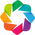

:Chord   [start,end]

In [10]:



from holoviews import opts
hv.extension('bokeh')

# Prepare data for chord diagram
links = list(df[['prior_disorder', 'later_disorder', 'n']].itertuples(index=False, name=None))
chord = hv.Chord(links).opts(
    opts.Chord(
        cmap='Category20', edge_color='source', labels='index',
        node_color='index', width=500, height=500, title="Chord Diagram"
    )
)
chord

## 4. Directed Graph (Flow Style)

**Description:**  
This directed graph represents transitions between disorders as a network. Arrows show the direction of flow, and edge thickness reflects the number of cases (`n`).

**Features used:**  
- `prior_disorder` (source)
- `later_disorder` (target)
- `n` (edge weight)

**Observation:**  
- The graph structure highlights the main transition pathways and their relative strengths.

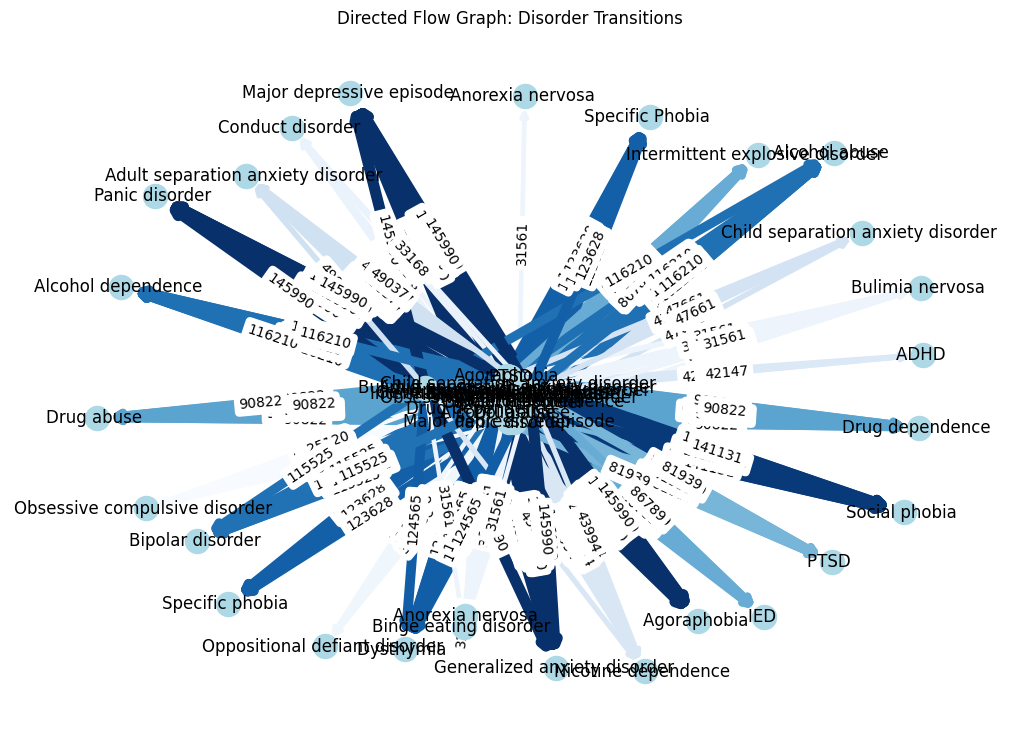

In [12]:


G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['prior_disorder'], row['later_disorder'], weight=row['n'])

pos = nx.spring_layout(G, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]
max_w = max(weights)
widths = [2 + 6*(w/max_w) for w in weights]

plt.figure(figsize=(10,7))
nx.draw(G, pos, with_labels=True, node_color='lightblue', arrows=True, width=widths, edge_color=weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)})
plt.title("Directed Flow Graph: Disorder Transitions")
plt.show()

## 5. Stream Graph

**Description:**  
A stream graph visualizes how the number of transitions from each prior disorder changes across different later disorders (or, if you have a time/stage column, use that for the x-axis).

**Features used:**  
- `prior_disorder` (category/color)
- `later_disorder` (x-axis)
- `n` (y-axis/height)

**Observation:**  
- The stream graph shows which prior disorders contribute most to each later disorder.

In [15]:


# Aggregate for stream graph: sum n for each prior-later pair
stream_data = df.groupby(['later_disorder', 'prior_disorder']).agg({'n': 'sum'}).reset_index()

chart = alt.Chart(stream_data).mark_area().encode(
    x='later_disorder:N',
    y='n:Q',
    color='prior_disorder:N'
).properties(
    width=600,
    height=300,
    title="Stream Graph: Disorder Transitions"
)
chart.show()

alt.Chart(...)